In [ ]:
import matplotlib.pyplot as plt
import numpy as np

nb_patterns = 3   # Number of patterns to learn
pattern_width = 5
pattern_height = 5
max_iterations = 10

# Define Patterns
patterns = np.array([
   [1,-1,-1,-1,1,1,-1,1,1,-1,1,-1,1,1,-1,1,-1,1,1,-1,1,-1,-1,-1,1.],    # Letter D
   [1,-1,-1,-1,-1,1,1,1,-1,1,1,1,1,-1,1,-1,1,1,-1,1,-1,-1,-1,1,1.],     # Letter J
   [-1,1,1,1,-1,-1,-1,1,-1,-1,-1,1,-1,1,-1,-1,1,1,1,-1,-1,1,1,1,-1.],], # Letter M
   dtype=np.float)

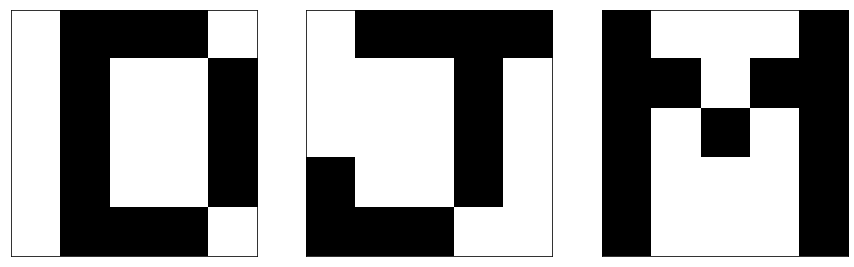

In [ ]:
# Show the patterns
fig, ax = plt.subplots(1, nb_patterns, figsize=(15, 10))

for i in range(nb_patterns):
    ax[i].matshow(patterns[i].reshape((pattern_height, pattern_width)), cmap='gray')
    ax[i].set_xticks([])
    ax[i].set_yticks([])

In [ ]:
# Train the network
W = np.zeros((pattern_width * pattern_height, pattern_width * pattern_height))

for i in range(pattern_width * pattern_height):
    for j in range(pattern_width * pattern_height):
        if i == j or W[i, j] != 0.0:
            continue

        w = 0.0

        for n in range(nb_patterns):
            w += patterns[n, i] * patterns[n, j]

        W[i, j] = w / patterns.shape[0]
        W[j, i] = W[i, j]

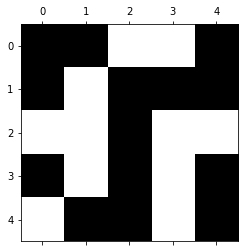

In [ ]:
# Test the Network
# Create a corrupted pattern S
S = np.array( [-1,-1,1,1,-1,-1,1,-1,-1,-1,1,1,-1,1,1,-1,1,-1,1,-1,1,-1,-1,1,-1.],
   dtype=np.float)

# Show the corrupted pattern
fig, ax = plt.subplots()
ax.matshow(S.reshape((pattern_height, pattern_width)), cmap='gray')

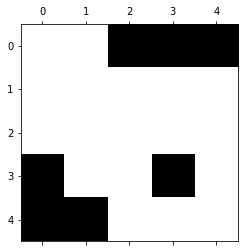

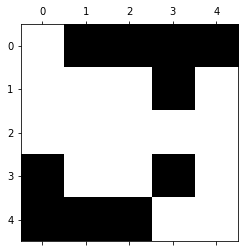

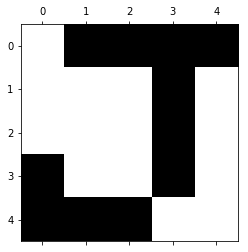

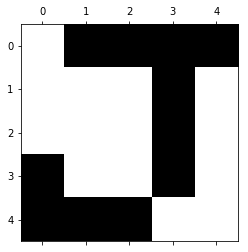

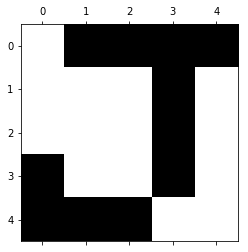

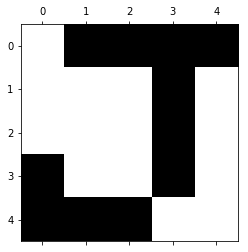

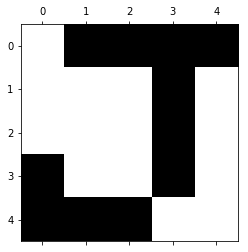

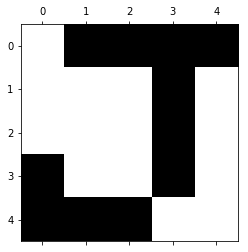

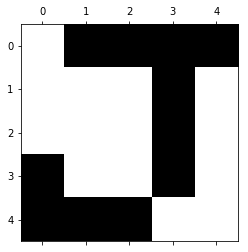

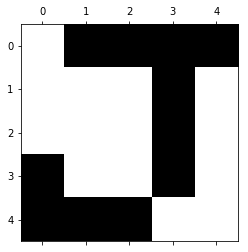

In [ ]:
h = np.zeros((pattern_width * pattern_height))
#Defining Hamming Distance matrix for seeing convergence
hamming_distance = np.zeros((max_iterations,nb_patterns))
for iteration in range(max_iterations):
    for i in range(pattern_width * pattern_height):
        i = np.random.randint(pattern_width * pattern_height)
        h[i] = 0
        for j in range(pattern_width * pattern_height):
            h[i] += W[i, j]*S[j]
        S = np.where(h<0, -1, 1)

    fig, ax = plt.subplots()
    ax.matshow(S.reshape((pattern_height, pattern_width)), cmap='gray')
